In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('./Data/Manual Readings of pH, EC and Temperature.csv').drop(['ppm'], 1)
df.head()

,Temperature,pH,Adjusted pH,EC
0,24.81,7.0,6.908699,0.82
1,25.31,7.0,6.978184,0.29
2,25.56,7.0,6.973090,0.48
3,25.75,7.0,6.935358,0.48
4,25.75,7.0,7.010641,0.47


In [3]:
df.describe()

,Temperature,pH,Adjusted pH,EC
count,252.000000,252.000000,252.000000,252.000000
mean,25.408373,6.366667,6.346189,1.711310
std,0.429798,0.390117,0.384282,0.670198
min,23.870000,5.800000,5.688092,0.270000
25%,25.120000,6.000000,6.034491,1.420000
50%,25.440000,6.500000,6.377082,1.810000
75%,25.690000,6.600000,6.611272,2.110000
max,26.250000,7.000000,7.066736,2.630000


<AxesSubplot:xlabel='EC', ylabel='Adjusted pH'>

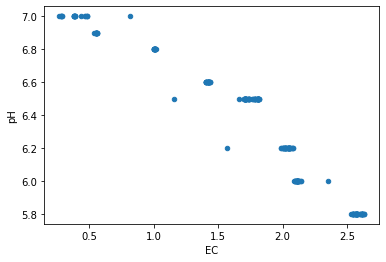

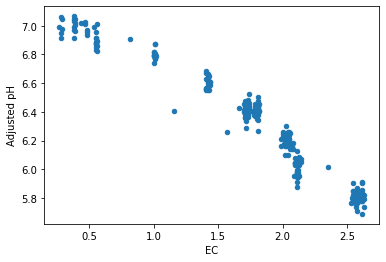

In [4]:
originalPhScatterData = df[['pH', 'EC']]
originalPhScatterData.plot.scatter(x='EC', y='pH')

adjustedPhScatterData = df[['Adjusted pH', 'EC']]
adjustedPhScatterData.plot.scatter(x='EC', y='Adjusted pH')

In [5]:
input_data = df[['EC', 'Temperature']]
input_data.head()

,EC,Temperature
0,0.82,24.81
1,0.29,25.31
2,0.48,25.56
3,0.48,25.75
4,0.47,25.75


In [6]:
output_data = df.drop(['EC', 'pH', 'Temperature'], 1)
output_data.head()

,Adjusted pH
0,6.908699
1,6.978184
2,6.973090
3,6.935358
4,7.010641


In [7]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.20, random_state=7)

In [8]:
model = Sequential()
model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the defined model
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [10]:
# Train the keras model with the train dataset
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 667us/step - loss: 35.9212 - mse: 35.9212
Epoch 2/500
7/7 [==============================] - 0s 667us/step - loss: 26.6989 - mse: 26.6989
Epoch 3/500
7/7 [==============================] - 0s 500us/step - loss: 6.7394 - mse: 6.7394
Epoch 4/500
7/7 [==============================] - 0s 667us/step - loss: 0.1796 - mse: 0.1796
Epoch 5/500
7/7 [==============================] - 0s 667us/step - loss: 0.1662 - mse: 0.1662
Epoch 6/500
7/7 [==============================] - 0s 667us/step - loss: 0.1399 - mse: 0.1399
Epoch 7/50

In [ ]:
# Evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: ', accuracy * 100)

In [ ]:
# Create a HDF5 file to save the model
model.save('../models/categorical_crossentropy.h5')